In [1]:
%matplotlib inline
from MuXTalk_master_v2 import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os

In [2]:
def plot_zscores_overall(overall_rand_zscores_df_dict, overall_multilink_counts_stats_df_dict, all_motif_types, proj_path, input_GRN, 
                         ylimneg, ylimpos, save_fig=False):

    # suppress the '00' types of multilink that throw off the ylim
    overall_rand_zscores_df_dict['overall_multiplex'].loc['00'] = np.nan
    overall_multilink_counts_stats_df_dict['overall_multiplex'].loc['00'] = np.nan         
    
    fig = plt.figure()
    fig.set_size_inches(10, 5)
    sns.set(font_scale=1.5)
    with sns.axes_style('ticks'):

        for p in ['overall_multiplex']:
            
            N_rand = overall_rand_zscores_df_dict[p].shape[1]
            plt.subplot(111)
            for i in np.arange(N_rand):
                plt.scatter(x=overall_rand_zscores_df_dict[p].index, y=overall_rand_zscores_df_dict[p][i], marker='+', s=150, c='grey', alpha=0.5)

            shapes = []
            colors = []
            for i in overall_multilink_counts_stats_df_dict[p].index:
                if ((overall_multilink_counts_stats_df_dict[p].loc[i]['z-score'] > 0) & 
                    (overall_multilink_counts_stats_df_dict[p].loc[i]['p-value'] <= 0.05)):
                    shapes.append('^')
                    colors.append('tomato')
                elif ((overall_multilink_counts_stats_df_dict[p].loc[i]['z-score'] < 0) & 
                      (overall_multilink_counts_stats_df_dict[p].loc[i]['p-value'] <= 0.05)):
                    shapes.append('v')
                    colors.append('dodgerblue')
                elif (overall_multilink_counts_stats_df_dict[p].loc[i]['p-value'] > 0.05):
                    shapes.append('o')
                    colors.append('k')
                else:
                    shapes.append('')
                    colors.append('w')     

            for xp, yp, m, c in zip(overall_rand_zscores_df_dict[p].index, overall_multilink_counts_stats_df_dict[p]['z-score'], shapes, colors):
                plt.scatter(x=xp, y=yp, marker=m, s=150, c=c)

            plt.plot([-1, len(all_motif_types)+1], [0, 0], '-', color='k')
            plt.xlim(-1, len(all_motif_types))
            plt.ylim(ylimneg, ylimpos)
            plt.xlabel('Multilink motif')
            plt.ylabel('z-score')
            plt.xticks(rotation=90)
            plt.title('%s' % p)
            ax = plt.gca()
            ax.grid(which='major', axis='x', linestyle='--')
            plt.tight_layout()
        
        if save_fig == True:
            plt.savefig(proj_path + input_GRN + '_overall_multilink_zscores_ylimneg%s_ylimpos%s.pdf' % (ylimneg, ylimpos), format='pdf')
        
        plt.show()

In [3]:
def plot_zscores(KEGG_all_paths, rand_zscores_df_dict, multilink_counts_stats_df_dict, all_motif_types, proj_path, input_GRN, save_fig=False):
        
    fig = plt.figure()
    fig.set_size_inches(48, 60)
    sns.set(font_scale=1.5)
    with sns.axes_style('ticks'):

        for nfig, p in enumerate(tqdm(KEGG_all_paths, position=0, leave=True)):
            
            # suppress the '00' types of multilink that throw off the ylim
            rand_zscores_df_dict[p].loc['00'] = np.nan
            multilink_counts_stats_df_dict[p].loc['00'] = np.nan     
            
            N_rand = rand_zscores_df_dict[p].shape[1]
            plt.subplot(13, 5, nfig+1)
            for i in np.arange(N_rand):
                plt.scatter(x=rand_zscores_df_dict[p].index, y=rand_zscores_df_dict[p][i], marker='+', s=150, c='grey', alpha=0.5)

            shapes = []
            colors = []
            for i in multilink_counts_stats_df_dict[p].index:
                if (multilink_counts_stats_df_dict[p].loc[i]['z-score'] > 0) & (multilink_counts_stats_df_dict[p].loc[i]['p-value'] <= 0.05):
                    shapes.append('^')
                    colors.append('tomato')
                elif (multilink_counts_stats_df_dict[p].loc[i]['z-score'] < 0) & (multilink_counts_stats_df_dict[p].loc[i]['p-value'] <= 0.05):
                    shapes.append('v')
                    colors.append('dodgerblue')
                elif (multilink_counts_stats_df_dict[p].loc[i]['p-value'] > 0.05):
                    shapes.append('o')
                    colors.append('k')
                else:
                    shapes.append('')
                    colors.append('w')     

            for xp, yp, m, c in zip(rand_zscores_df_dict[p].index, multilink_counts_stats_df_dict[p]['z-score'], shapes, colors):
                plt.scatter(x=xp, y=yp, marker=m, s=150, c=c)

            plt.plot([-1, len(all_motif_types)+1], [0, 0], '-', color='k')
            plt.xlim(-1, len(all_motif_types))
            plt.xlabel('Multilink motif')
            plt.ylabel('z-score')
            plt.xticks(rotation=90)
            plt.title('%s' % p)
            ax = plt.gca()
            ax.grid(which='major', axis='x', linestyle='--')
            plt.tight_layout()
        if save_fig == True:
            plt.savefig(proj_path + input_GRN + '_multilink_zscores.pdf', format='pdf')
        
        plt.show()

# Analyses

In [4]:
proj_path = '/Volumes/Partition1/Pathway_crosstalk_files/MuXTalk_R2_analyses/'
input_filenames_dict = {'HUGO_symb_entrez_uniprot': 'HugoGene_20200528.txt', 'PPI_Cheng_2019_data': 'PPI_Cheng_NatComms2019.csv',
                       'KEGG_all_nodes_df': 'KEGG_expanded_all_nodes.csv', 'KEGG_all_edges_df': 'KEGG_expanded_all_edges.csv',
                        'df_motinf' : 'cisbpall_motinf.txt', 'XTalk_DB': 'XTalkDB_crosstalk.csv', 
                        'almen_etal': 'almen_etal_12915_2009_258_MOESM1_ESM.csv', 
                        'lambert_etal': 'lambert_etal_1-s2.0-S0092867418301065-mmc2_TableS1.csv'
                       }
npz_filenames_dict = {'GRN': 'A_GRN_sparr_rand_npz_files/', 'KEGG_e': 'A_KEGG_e_sparr_rand_npz_files/', 
                      'KEGGPPI': 'A_KEGGPPI_sparr_rand_npz_files/'}
input_GRN = 'HumanGRN10e6'

## Process Human GRNs and write to directory

In [5]:
process_GRN_cisbp_data(proj_path, input_filenames_dict, 'RefSeqMotifMap_-1000_500_1e-4', 'HumanGRN10e4')
process_GRN_cisbp_data(proj_path, input_filenames_dict, 'RefSeqMotifMap_-1000_500_1e-5', 'HumanGRN10e5')
process_GRN_cisbp_data(proj_path, input_filenames_dict, 'RefSeqMotifMap_-1000_500_1e-6', 'HumanGRN10e6')

## Preprocess KEGG, PPI and GR networks

In [6]:
input_PPI = 'PPI_Cheng_NatComms2019'
input_GRN = 'HumanGRN10e6'
input_PPI_ID_format = 'Entrez'
input_GRN_ID_format = 'Gene_Symbol'

(KEGG_PPI_allnodes_entrez, GRN_KEGG_PPI_edges, PPI_all_edges_entrez, KEGG_PPI_all_edges_entrez, KEGG_PPI_allnodes_entrez_df, 
 KEGG_interaction_types_dict, KEGG_all_edges_entrez, KEGG_all_paths, KEGG_path_nodes_entrez_dict, 
 all_motif_types, all_motif_types_list) = process_data(proj_path, input_PPI, input_PPI_ID_format, 
                                                       input_GRN, input_GRN_ID_format, input_filenames_dict)

(A_GRN_sparr, A_PPI_sparr, A_KEGGPPI_sparr, A_KEGG_e_sparr_dict) = sparse_layers(KEGG_PPI_allnodes_entrez, GRN_KEGG_PPI_edges, 
                                                                                 PPI_all_edges_entrez, 
                                                                                 KEGG_all_edges_entrez, KEGG_PPI_all_edges_entrez, 
                                                                                 KEGG_interaction_types_dict)

(KEGG_allnodes_entrez_df, A_KEGG_sparr) = process_KEGG(KEGG_all_edges_entrez, proj_path, input_filenames_dict)

Loading Gene Symbol-Entrez ID-Uniprot ID mappings...
Loading PPI edges...
Processing PPI edgelist...
Loading GRN edges...
Processing GRN edgelist...
Loading KEGG signaling network edges...
Cross-mapping Gene Symbols, Entrez IDs and Uniprot IDs...
Combining KEGG and PPI edges...
Generating edge and node dictionaries of KEGG pathways...
Generating KEGG pathway-specific dataframes...
Generating sparse array for the  GRN...


100%|██████████| 34643/34643 [00:00<00:00, 41887.99it/s]


Generating sparse array for the  PPI...


100%|██████████| 217160/217160 [00:03<00:00, 66238.19it/s]


Generating sparse array for KEGG and PPI combined...


  0%|          | 0/11 [00:00<?, ?it/s]

Generating edge type-specific sparse arrays for KEGG...


100%|██████████| 11/11 [02:08<00:00, 11.66s/it]


Generating adjacency matrix for the KEGG signaling network...


100%|██████████| 24222/24222 [00:00<00:00, 119083.79it/s]


## Preprocess XTalkDB data for benchmarking

In [7]:
(common_crosstalk_paths, XTalk_DB_positives_common, XTalk_DB_positives_common_str) = XTalk_DB(KEGG_all_paths, proj_path, input_filenames_dict)

Processing XTalkDB data for benchmarking...


## Randomize/read from file the signaling and GRN layers

In [8]:
A_GRN_sparr_rand_dict = randomize_GRN(A_GRN_sparr, proj_path, input_GRN, input_PPI, N_runs=500, N_swap=10, return_output=True)

Reading ensemble of randomized GRN sparse  matrices...


In [9]:
A_KEGG_e_sparr_rand_dict = randomize_KEGG_e(A_KEGG_e_sparr_dict, KEGG_interaction_types_dict, proj_path, input_PPI, N_runs=500, N_swap=10, 
                                            return_output=True)

Reading ensemble of randomized edge type-specific KEGG sparse  matrices... (This may take 5-10 mins.)


In [10]:
A_KEGG_e_sparr_rand_dict_dir = proj_path + '%s_A_KEGG_e_sparr_rand_dict_500runs.pickle' % input_PPI
A_KEGGPPI_sparr_rand_dict = randomize_KEGGPPI(KEGG_PPI_allnodes_entrez, KEGG_interaction_types_dict, A_KEGG_e_sparr_rand_dict_dir, proj_path, 
                                              input_PPI, return_output=True)

Reading ensemble of randomized KEGG+PPI combined sparse  matrices...


In [11]:
A_KEGG_sparr_rand_dict = randomize_KEGG(A_KEGG_sparr, proj_path, N_runs=500, N_swap=10, return_output=True)

Reading ensemble of randomized KEGG sparse  matrices...


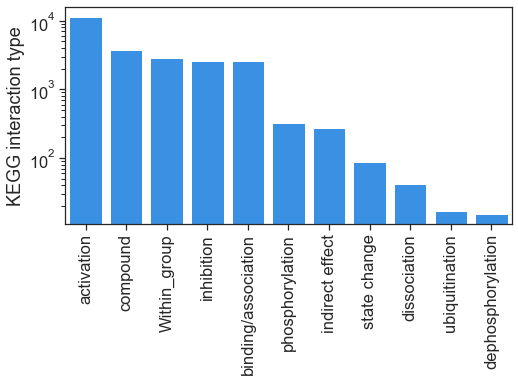

In [12]:
sns.set(font_scale=1.5)
fig = plt.figure()
fig.set_size_inches(8, 4)
with sns.axes_style("ticks"):
    sns.barplot(x=pd.DataFrame(KEGG_all_edges_entrez.iloc[KEGG_all_edges_entrez[['NCBI Gene ID(supplied by NCBI)_x', 
                                                                                 'NCBI Gene ID(supplied by NCBI)_y']]
                                                          .drop_duplicates().index]['Edge_subtype'].value_counts()).index, 
               y=pd.DataFrame(KEGG_all_edges_entrez.iloc[KEGG_all_edges_entrez[['NCBI Gene ID(supplied by NCBI)_x', 
                                                                                 'NCBI Gene ID(supplied by NCBI)_y']]
                                                          .drop_duplicates().index]['Edge_subtype'].value_counts())['Edge_subtype'], color='dodgerblue')
plt.yscale('log')
plt.xticks(rotation = 90)
plt.ylabel('KEGG interaction type')
#plt.savefig(proj_path + 'KEGGpostprocessing_UNIQedge_types.pdf', format='pdf', bbox_inches='tight')     
plt.show()

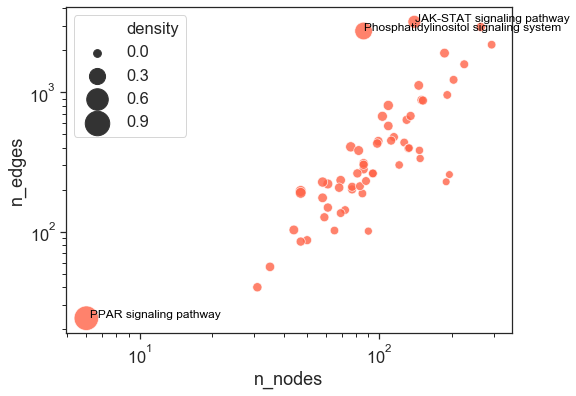

In [13]:
KEGG_netstats_df = KEGG_netstats(KEGG_path_nodes_entrez_dict, KEGG_all_edges_entrez)

sns.set(font_scale=1.5)
fig = plt.figure()
fig.set_size_inches(8, 6)
with sns.axes_style("ticks"):
    sns.scatterplot(data=KEGG_netstats_df[KEGG_netstats_df.index != 'IL-17 signaling pathway'], 
                    x='n_nodes', y='n_edges', size='density', legend='brief', sizes=(60, 600), alpha=0.8, color='tomato')

    texts = []
    for line in range(0, KEGG_netstats_df[KEGG_netstats_df.index != 'IL-17 signaling pathway'].shape[0]):
        if KEGG_netstats_df[KEGG_netstats_df.index != 'IL-17 signaling pathway']['density'][line] > 0.1:
            texts.append(plt.text(KEGG_netstats_df[KEGG_netstats_df.index != 'IL-17 signaling pathway']['n_nodes'][line]+0.2, 
                                  KEGG_netstats_df[KEGG_netstats_df.index != 'IL-17 signaling pathway']['n_edges'][line], 
                                  KEGG_netstats_df[KEGG_netstats_df.index != 'IL-17 signaling pathway'].index[line], 
                                  size=12, color='black', weight='normal'))
        else:
            texts.append(plt.text(KEGG_netstats_df[KEGG_netstats_df.index != 'IL-17 signaling pathway']['n_nodes'][line]+0.2, 
                                  KEGG_netstats_df[KEGG_netstats_df.index != 'IL-17 signaling pathway']['n_edges'][line], '', 
                                  size=12, color='black', weight='normal'))     
    plt.xscale('log')
    plt.yscale('log')
    #plt.savefig(proj_path + 'KEGG_pathway_densities_log.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [14]:
(overall_overlap_edge_counts, overall_overlap_edge_counts_rand, 
 overall_overlap_zscore, overall_overlap_emp_pval) = overall_edge_overlap(A_GRN_sparr, A_KEGGPPI_sparr, A_GRN_sparr_rand_dict, 
                                                                          A_KEGGPPI_sparr_rand_dict, proj_path, input_GRN)

print('Number of overlapping edges: ', overall_overlap_edge_counts)
print('Mean number of overlapping edges in randomized layers: ', overall_overlap_edge_counts_rand['0'].mean())
print('Standard deviation of overlapping edges in randomized layers: ', overall_overlap_edge_counts_rand['0'].std())
print('Z-score: ', overall_overlap_zscore['0'])
print('Empirical p-value: ', overall_overlap_emp_pval['0'])

Reading the overlapping edges between the signaling and regulatory layer for the entire multilayer network...
Number of overlapping edges:  226
Mean number of overlapping edges in randomized layers:  139.26
Standard deviation of overlapping edges in randomized layers:  11.526931086831443
Z-score:  7.532522722064559
Empirical p-value:  0.0


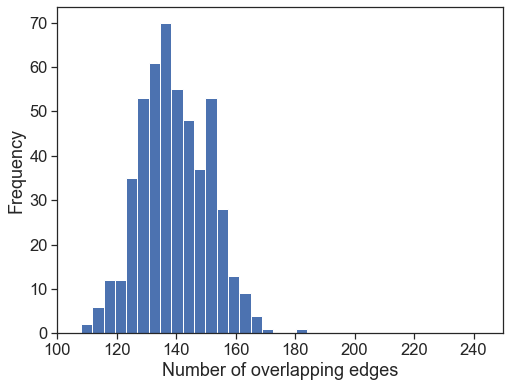

In [15]:
sns.set(font_scale=1.5)
fig = plt.figure()
fig.set_size_inches(8, 6)
with sns.axes_style("ticks"):
    plt.hist(overall_overlap_edge_counts_rand['0'], bins=20)
    plt.ylabel('Frequency')
    plt.xlabel('Number of overlapping edges')
    plt.xlim(100, 250)
    #plt.savefig(proj_path + input_GRN + '_overall_layer_edge_overlap.pdf', format='pdf', bbox_inches='tight') 
    plt.show()

## Calculate edge overlap between the signaling and regulatory layer within each KEGG signaling pathway

In [16]:
(pathway_overlap_edge_stats, pathway_overlap_edge_counts_rand) = pathway_edge_overlap(KEGG_all_paths, A_GRN_sparr_rand_dict,  
                                                                                      KEGG_PPI_allnodes_entrez_df, 
                                                                                      KEGG_path_nodes_entrez_dict, 
                                                                                      A_KEGGPPI_sparr, A_GRN_sparr, 
                                                                                      A_KEGGPPI_sparr_rand_dict, 
                                                                                      proj_path, input_GRN)

Reading the overlapping edges between the signaling and regulatory layer within each KEGG pathway...


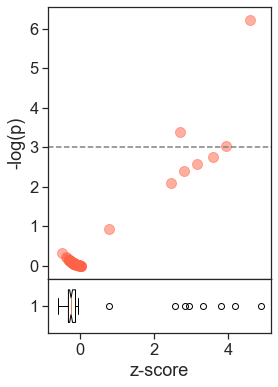

-0.22914554993106506

In [17]:
sns.set(font_scale=1.5)
fig = plt.figure()
fig.set_size_inches(4, 6)
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1])
gs.update(hspace=0.0)
with sns.axes_style("ticks"):
    ax0 = plt.subplot(gs[0])
    ax0.scatter(x=pathway_overlap_edge_stats['z-score'], y=-np.log(pathway_overlap_edge_stats['emp. pval'].astype(float)), 
                color='tomato', alpha=0.5, s=100)
    ax0.plot([-1, 5.5], [-np.log(0.05), -np.log(0.05)], color='grey', linestyle='--')
    ax0.set_xlim(-1, 5.5)
    ax0.set_ylabel('-log(p)')
    ax0.set_xlabel('z-score')
    ax1 = plt.subplot(gs[1])    
    ax1.boxplot(pathway_overlap_edge_stats[~pd.isnull(pathway_overlap_edge_stats['z-score'])]['z-score'], ['a'], vert=False, widths = 0.6)
    ax1.set_xlabel('z-score')
    plt.subplots_adjust(wspace=0, hspace=0)

#plt.savefig(proj_path + input_GRN + '_withinKEGG_edge_overlap_zscorelogP.pdf', format='pdf', bbox_inches='tight')     
plt.show()

pathway_overlap_edge_stats['z-score'].median()

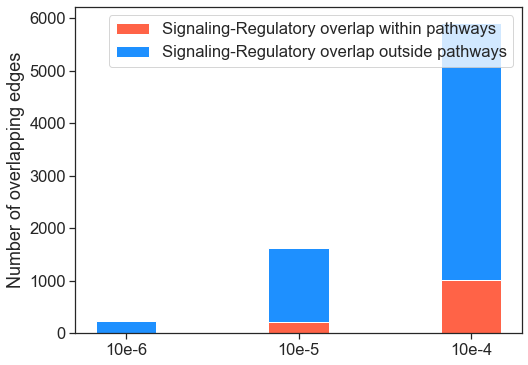

In [18]:
pathway_overlap_edge_stats_1e6 = pd.read_csv(proj_path + 'HumanGRN10e6_pathway_overlap_edge_stats.csv')
pathway_overlap_edge_stats_1e5 = pd.read_csv(proj_path + 'HumanGRN10e5_pathway_overlap_edge_stats.csv')
pathway_overlap_edge_stats_1e4 = pd.read_csv(proj_path + 'HumanGRN10e4_pathway_overlap_edge_stats.csv')

labels = ['10e-6', '10e-5', '10e-4']
in_path = [pathway_overlap_edge_stats_1e6['Edge overlap'].sum(), 
             pathway_overlap_edge_stats_1e5['Edge overlap'].sum(), 
             pathway_overlap_edge_stats_1e4['Edge overlap'].sum()]
out_path = [226-in_path[0], 1625-in_path[1], 5917-in_path[2]]

width = 0.35 

sns.set(font_scale=1.5)
fig = plt.figure()
fig.set_size_inches(8, 6)
with sns.axes_style("ticks"):
    plt.bar(labels, in_path, width, label='Signaling-Regulatory overlap within pathways', color='tomato')
    plt.bar(labels, out_path, width,  bottom=in_path, label='Signaling-Regulatory overlap outside pathways', color='dodgerblue')
    plt.ylabel('Number of overlapping edges')
    plt.legend()
    #plt.savefig(proj_path + 'in_out_path_overlap_proportions_bar_allGRNs.pdf', format='pdf', bbox_inches='tight')
    plt.show()

## Multilink z-scores of the entire KEGG+PPI/GRN multiplex


In [19]:
overall_multilink_counts_df_dict = overall_multilink_counts(A_KEGGPPI_sparr, A_GRN_sparr, A_KEGG_e_sparr_dict, all_motif_types, 
                                                            all_motif_types_list, KEGG_interaction_types_dict, proj_path, input_GRN)

overall_multilink_counts_rand_df_dict = overall_multilink_counts_rand(A_GRN_sparr_rand_dict, all_motif_types, A_KEGGPPI_sparr_rand_dict, 
                                                                      all_motif_types_list, KEGG_interaction_types_dict, 
                                                                      A_KEGG_e_sparr_rand_dict, proj_path, input_GRN, rand_start = 0, 
                                                                      N_rand = 100, N_swap = 10)

(overall_multilink_counts_stats_df_dict, 
 overall_rand_zscores_df_dict) = overall_multilink_zscores_pvals(KEGG_all_paths, overall_multilink_counts_rand_df_dict, 
                                                                 overall_multilink_counts_df_dict, all_motif_types, proj_path, 
                                                                 input_GRN, N_rand=100)

Reading multilink counts in the entire multilayer network...
Reading multilink counts in the entire multilayer network for randomized multilayer network ensebles...
Reading multilink statistics for the entire multilayer network...


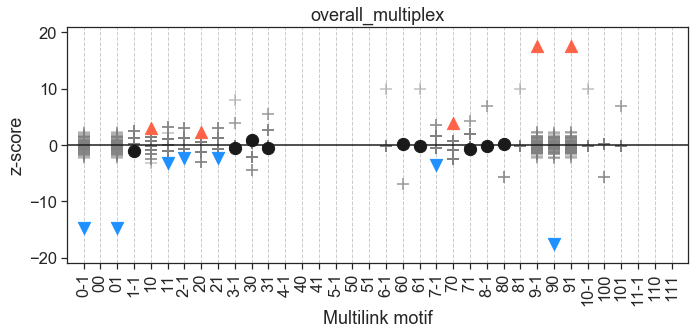

In [20]:
plot_zscores_overall(overall_rand_zscores_df_dict, overall_multilink_counts_stats_df_dict, all_motif_types, proj_path, input_GRN, 
                     ylimneg=-21, ylimpos=21, save_fig=False)

## Multilink z-scores of individual KEGG signaling pathways

In [21]:
multilink_counts_df_dict = multilink_counts(KEGG_all_paths, KEGG_PPI_allnodes_entrez_df, KEGG_path_nodes_entrez_dict, A_GRN_sparr, 
                                            A_KEGGPPI_sparr, all_motif_types_list, all_motif_types, KEGG_interaction_types_dict, 
                                            A_KEGG_e_sparr_dict, proj_path, input_GRN)

multilink_counts_rand_df_dict = multilink_counts_rand(A_GRN_sparr_rand_dict,KEGG_all_paths, KEGG_PPI_allnodes_entrez_df, 
                                                      KEGG_path_nodes_entrez_dict, all_motif_types, A_KEGGPPI_sparr_rand_dict, 
                                                      all_motif_types_list, KEGG_interaction_types_dict, A_KEGG_e_sparr_rand_dict, 
                                                      proj_path, input_GRN, rand_start = 100, N_rand = 100, N_swap = 10)

(multilink_counts_stats_df_dict, rand_zscores_df_dict) = multilink_zscores_pvals(KEGG_all_paths, multilink_counts_rand_df_dict, 
                                                                                 multilink_counts_df_dict, all_motif_types, proj_path, 
                                                                                 input_GRN, N_rand=100)

Reading multilink counts in each KEGG signaling pathway...
Reading multilink counts in each KEGG signaling pathway for randomized multilayer network ensebles...
Reading multilink statistics for each KEGG signaling pathway...


100%|██████████| 61/61 [01:15<00:00,  1.24s/it]


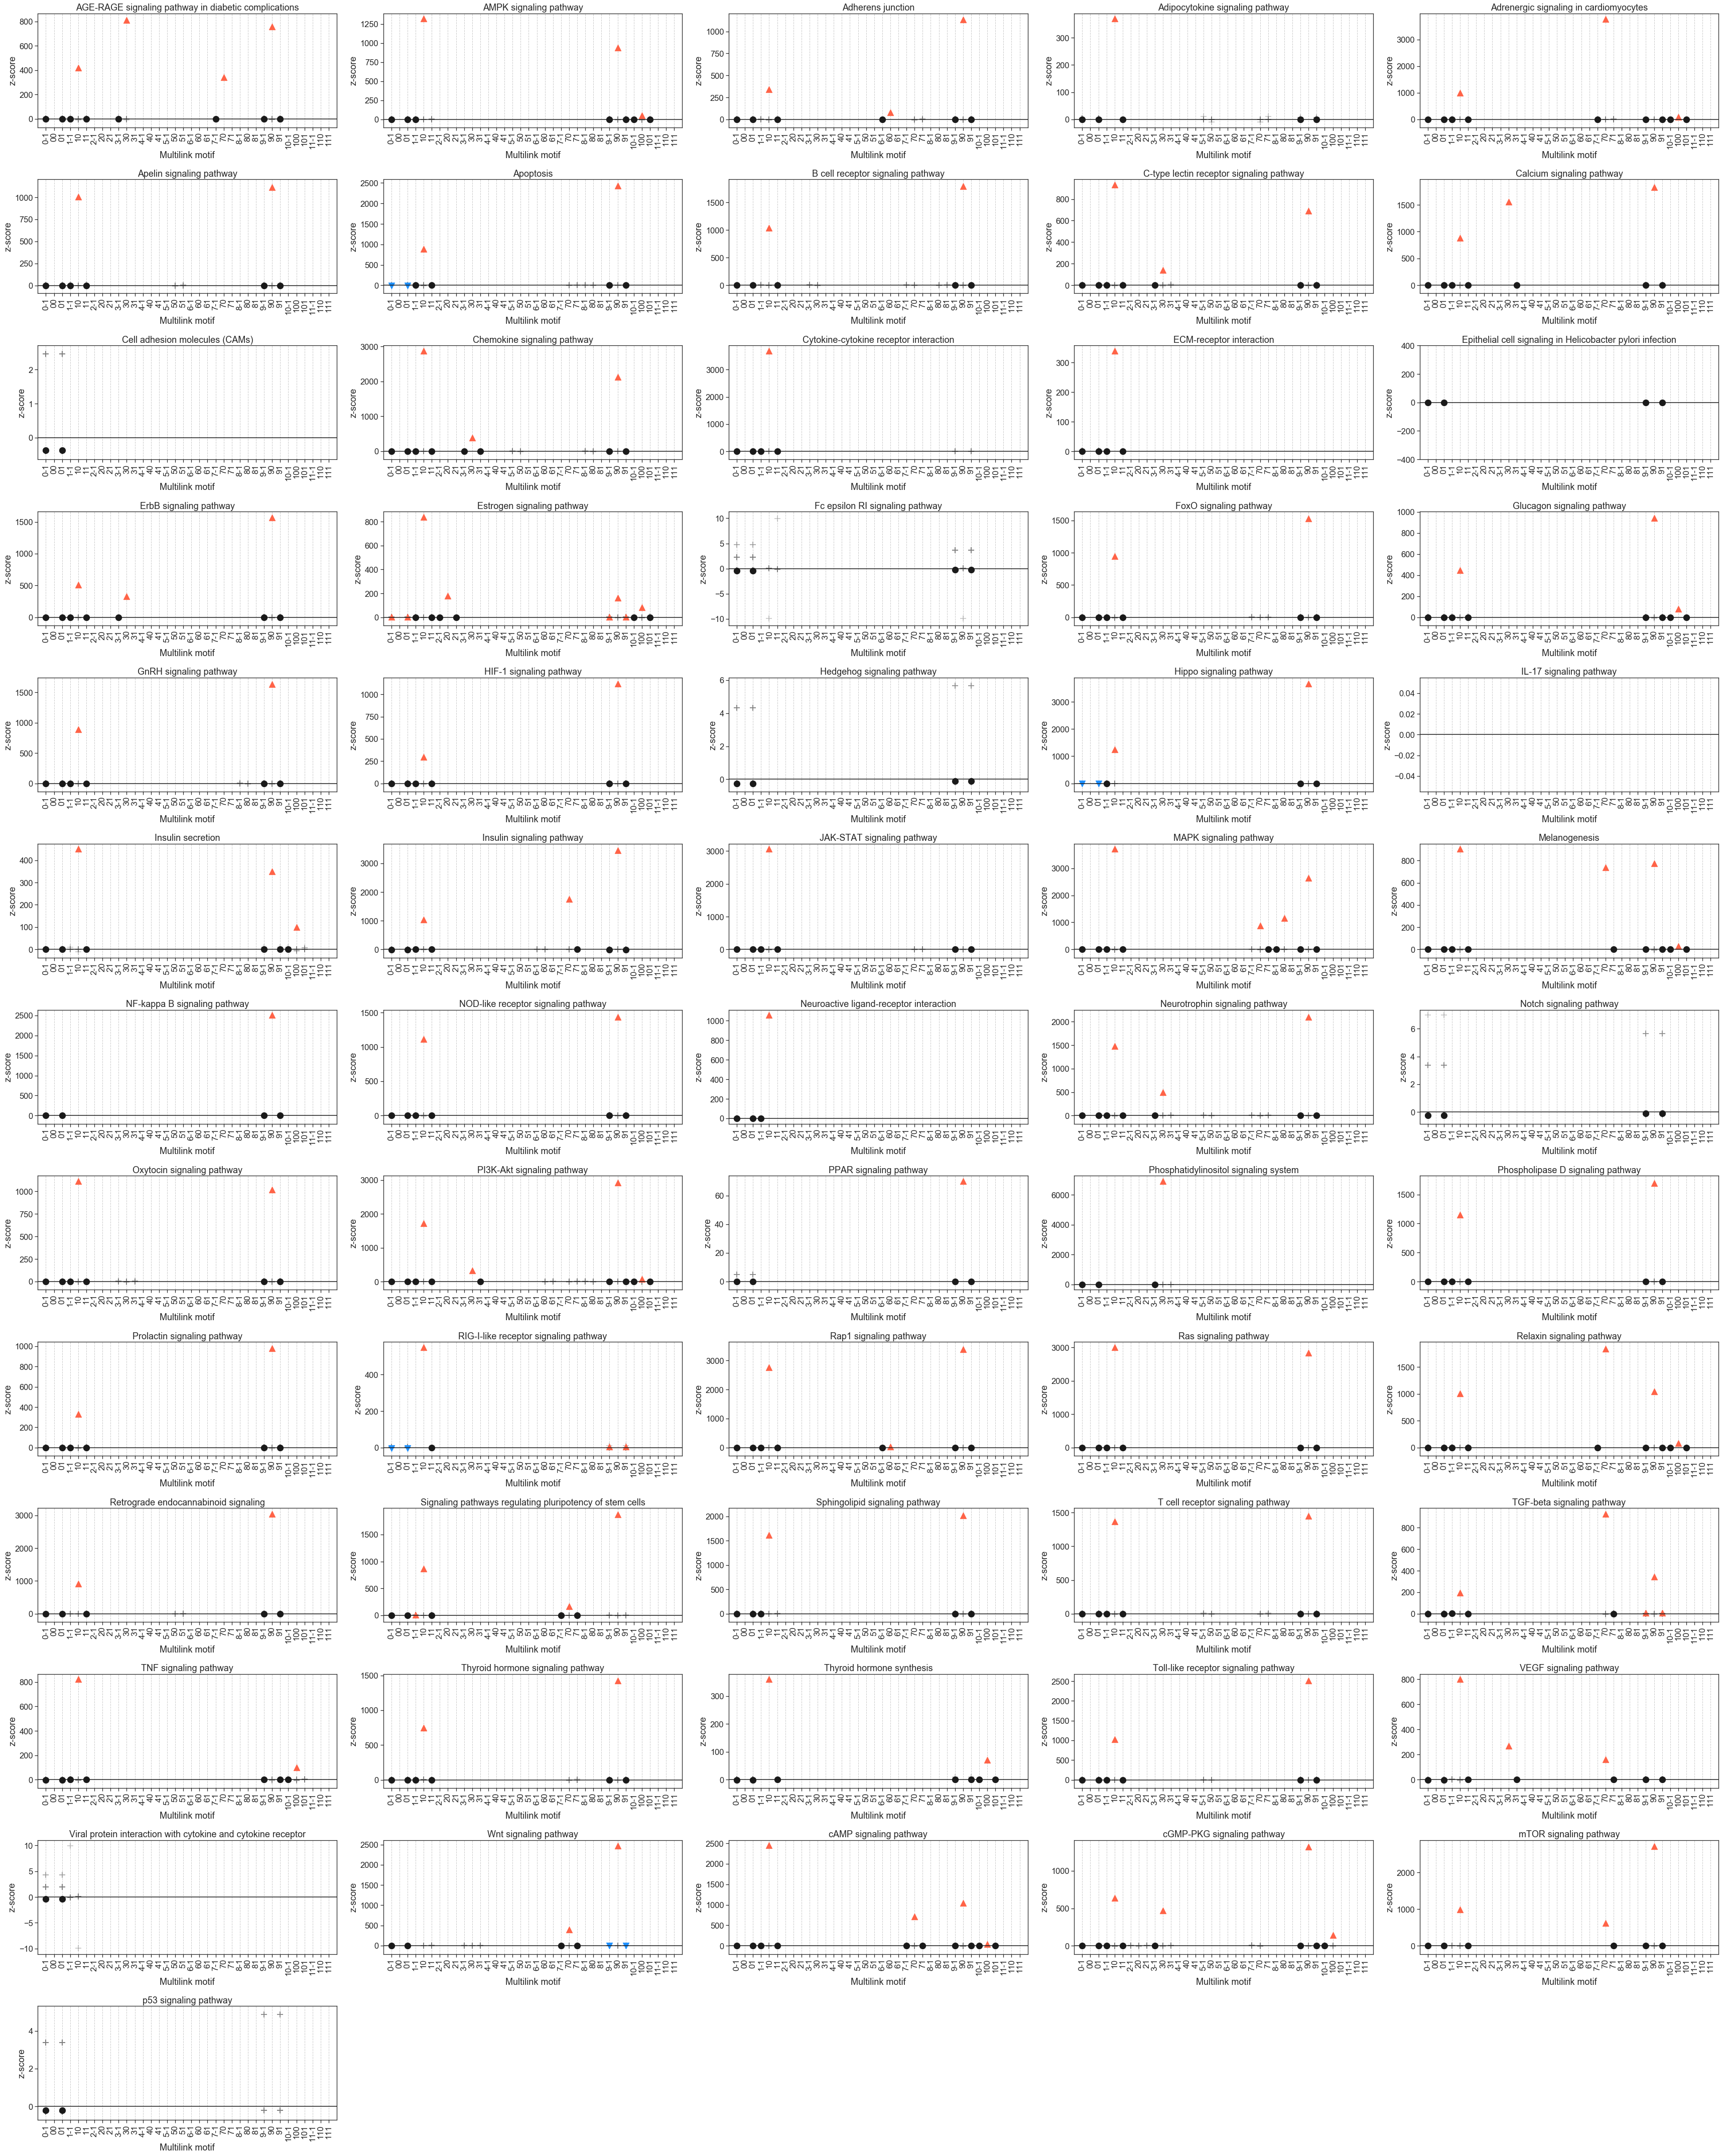

In [22]:
plot_zscores(KEGG_all_paths, rand_zscores_df_dict, multilink_counts_stats_df_dict, all_motif_types, proj_path, input_GRN, save_fig=False)

# Prediction of crosstalking pathways - Benchmark

## 1a) MuXTalk_between

In [23]:
between_paths_multilink_counts_df_dict = between_paths_multilink_counts(common_crosstalk_paths, KEGG_PPI_allnodes_entrez_df, 
                                                                        KEGG_path_nodes_entrez_dict, A_GRN_sparr, A_KEGGPPI_sparr, 
                                                                        all_motif_types_list, all_motif_types, KEGG_interaction_types_dict, 
                                                                        A_KEGG_e_sparr_dict, proj_path, input_GRN, input_PPI)

between_paths_multilink_counts_rand_df_dict = between_paths_multilink_counts_rand(A_GRN_sparr_rand_dict, common_crosstalk_paths, 
                                                                                  KEGG_PPI_allnodes_entrez_df, KEGG_path_nodes_entrez_dict, 
                                                                                  all_motif_types,A_KEGGPPI_sparr_rand_dict, 
                                                                                  all_motif_types_list, KEGG_interaction_types_dict, 
                                                                                  A_KEGG_e_sparr_rand_dict, proj_path, input_GRN, 
                                                                                  input_PPI, rand_start = 6200, N_rand = 100, N_swap = 10)

(between_paths_multilink_counts_stats_df_dict, 
 between_paths_rand_zscores_df_dict) = between_paths_multilink_zscores_pvals(common_crosstalk_paths, 
                                                                             between_paths_multilink_counts_rand_df_dict,
                                                                             between_paths_multilink_counts_df_dict, all_motif_types, 
                                                                             proj_path, input_GRN, input_PPI, N_rand=100)

Reading multilink counts of direct edges between all pairs of KEGG signaling pathways...
Reading multilink counts of direct edges between all pairs of KEGG signaling pathways for randomized multilayer network ensebles...
Reading multilink statistics for direct edges between all pairs of KEGG signaling pathways...


## 1b) MuXTalk_shortest

In [24]:
sp_threshold=1
shortest_path_edges_dict, shortest_path_intermediaries_dict = get_shortest_paths(A_KEGGPPI_sparr, common_crosstalk_paths, 
                                                                                 KEGG_PPI_allnodes_entrez_df, KEGG_path_nodes_entrez_dict, 
                                                                                 proj_path, input_PPI, sp_threshold=sp_threshold)

shortest_paths_multilink_counts_df_dict = shortest_paths_multilink_counts(common_crosstalk_paths, shortest_path_edges_dict, sp_threshold, 
                                                                          A_GRN_sparr, A_KEGGPPI_sparr, all_motif_types, all_motif_types_list,
                                                                          KEGG_interaction_types_dict, A_KEGG_e_sparr_dict, proj_path, 
                                                                          input_GRN, input_PPI)

shortest_paths_multilink_counts_rand_df_dict = shortest_paths_multilink_counts_rand(A_GRN_sparr_rand_dict, common_crosstalk_paths, 
                                                                                    shortest_path_edges_dict, sp_threshold, all_motif_types, 
                                                                                    A_KEGGPPI_sparr_rand_dict, all_motif_types_list, 
                                                                                    KEGG_interaction_types_dict, A_KEGG_e_sparr_rand_dict, 
                                                                                    proj_path, input_GRN, input_PPI, rand_start = 66200, 
                                                                                    N_rand = 100, N_swap = 10)

(shortest_paths_multilink_counts_stats_df_dict, 
 shortest_paths_rand_zscores_df_dict) = shortest_paths_multilink_zscores_pvals(common_crosstalk_paths, 
                                                                               shortest_paths_multilink_counts_rand_df_dict,
                                                                               sp_threshold, shortest_paths_multilink_counts_df_dict, 
                                                                               all_motif_types, proj_path, input_GRN, input_PPI, N_rand=100)

Reading the shortest paths with threshold (1) between all pairs of KEGG signaling pathways...
Reading multilink counts of shortest path edges with threshold (1) between all pairs of KEGG signaling pathways...
Reading multilink counts of shortest path edges with threshold (1) between all pairs of KEGG signaling pathways for randomized multilayer network ensebles...
Reading multilink statistics for shortest path edges with threshold (1) between all pairs of KEGG signaling pathways...


## 2) Node and edge overlap

In [26]:
node_edge_overlap_pairs_df = node_overlap_sig(KEGG_allnodes_entrez_df, KEGG_path_nodes_entrez_dict, KEGG_PPI_all_edges_entrez, KEGG_all_paths, 
                                              common_crosstalk_paths, proj_path)

Reading node and edge overlap significance for all pairs of KEGG signaling pathways...


## 3) Direct edges between pathways (a la Signalink)

In [29]:
KEGG_between_edges_df = KEGG_between_edges(common_crosstalk_paths, KEGG_allnodes_entrez_df, KEGG_path_nodes_entrez_dict, A_KEGG_sparr, 
                                           proj_path)

KEGG_between_edges_rand_df = KEGG_between_edges_rand(common_crosstalk_paths, KEGG_allnodes_entrez_df, KEGG_path_nodes_entrez_dict, 
                                                     A_KEGG_sparr_rand_dict, proj_path)

Reading the number of direct edges between all pairs of KEGG pathways in the KEGG signaling network...
Reading the number of direct edges between all pairs of KEGG pathways in the KEGG signaling network for randomized network ensebles...


## 4) XTalk

In [31]:
(almen_etal_rec_entrez_set, lambert_etal_TFs_entrez_set) = process_receptor_TF_data(proj_path, input_filenames_dict)

Obtaining cell surface receptor information from Almen et al. BMC biology 7.1 (2009): 1-14. ...
1350
1244
112
86
28
1211
Obtaining transcription factor information from Lambert et al. Cell 172.4 (2018): 650-665. ...
1629


In [36]:
K = 1

XTalk_chi_df = XTalk_chi(common_crosstalk_paths, KEGG_allnodes_entrez_df, KEGG_path_nodes_entrez_dict, A_KEGG_sparr, 
                         almen_etal_rec_entrez_set, lambert_etal_TFs_entrez_set, proj_path, K=K)

XTalk_chi_rand_df = XTalk_chi_rand(common_crosstalk_paths, KEGG_allnodes_entrez_df, KEGG_path_nodes_entrez_dict, A_KEGG_sparr_rand_dict, 
                                   almen_etal_rec_entrez_set, lambert_etal_TFs_entrez_set, proj_path, K=K, Nrand=100)

Reading chi statistic (XTalk) with K = 1 for all pairs of KEGG pathways... 
Reading chi statistic (XTalk) with K = 1 for all pairs of KEGG pathways for randomized network ensebles... 


# Plotting AUCs

In [44]:
master_auroc_df = pd.DataFrame(columns=['method', 'GRN', 'sp_threshold', 'K', 'detected_AUROC', 'detected_AUPRC', 'AUROC_mean', 'AUPRC_mean',
                                       'AUROC_std', 'AUPRC_std'])
master_auroc_df['method'] = ['MuXTalk_between', 'MuXTalk_shortest', 'MuXTalk_shortest', 'MuXTalk_shortest', 'XTalk', 'XTalk', 'XTalk', 'XTalk', 
                             'XTalk', 'XTalk', 'XTalk', 'XTalk', 'XTalk', 'node_overlap', 'edge_overlap', 'direct_edges']
master_auroc_df['GRN'] = ['HumanGRN10e6', 'HumanGRN10e6', 'HumanGRN10e6', 'HumanGRN10e6', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
master_auroc_df['sp_threshold'] = [' ', '1', '2', 'None', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
master_auroc_df['K'] = [' ', ' ', ' ', ' ', '1', '2', '4', '6', '8', '10', '20', '50', '100', ' ', ' ', ' ']
master_auroc_df['method_params'] = master_auroc_df['method'] + master_auroc_df['sp_threshold'] + master_auroc_df['GRN'] + master_auroc_df['K']

AUROC_dict = {}
AUPRC_dict = {}

for i in tqdm(np.arange(len(master_auroc_df)), position=0, leave=True):

    (detected_ranked_pathway_pairs_df, detected_ranked_pathway_pairs, 
     ranked_pathway_pairs_df, ranked_pathway_pairs, len_sig) = get_ranked_pathway_pairs_benchmark(XTalk_DB_positives_common_str, common_crosstalk_paths, 
                                                                                        proj_path,
                                                                               method=master_auroc_df.at[i, 'method'], 
                                                                               multilink_params={'GRN': master_auroc_df.at[i, 'GRN'], 
                                                                                                 'PPI': 'PPI_Cheng_NatComms2019',
                                                                                            'sp_threshold': master_auroc_df.at[i, 'sp_threshold']}, 
                                                                               XTalk_params={'K': master_auroc_df.at[i, 'K'], 'Nrand': 100})

    detected_roc_pr_stats = detected_auroc_auprc(detected_ranked_pathway_pairs, common_crosstalk_paths, 
                                                                 XTalk_DB_positives_common_str)
    roc_pr_stats, AUROCs, AUPRCs = auroc_auprc(ranked_pathway_pairs, ranked_pathway_pairs_df, len_sig, common_crosstalk_paths, 
                               XTalk_DB_positives_common_str, nonsig_Nrand = 1000)
    
    master_auroc_df.at[i, 'detected_AUROC'] = detected_roc_pr_stats['AUROC']
    master_auroc_df.at[i, 'detected_AUPRC'] = detected_roc_pr_stats['AUPRC']
    master_auroc_df.at[i, 'AUROC_mean'] = roc_pr_stats['AUROC_mean']
    master_auroc_df.at[i, 'AUPRC_mean'] = roc_pr_stats['AUPRC_mean']
    master_auroc_df.at[i, 'AUROC_std'] = roc_pr_stats['AUROC_std']
    master_auroc_df.at[i, 'AUPRC_std'] = roc_pr_stats['AUPRC_std']
    
    AUROC_dict[i] = AUROCs
    AUPRC_dict[i] = AUPRCs

100%|██████████| 1/1 [02:00<00:00, 120.81s/it]


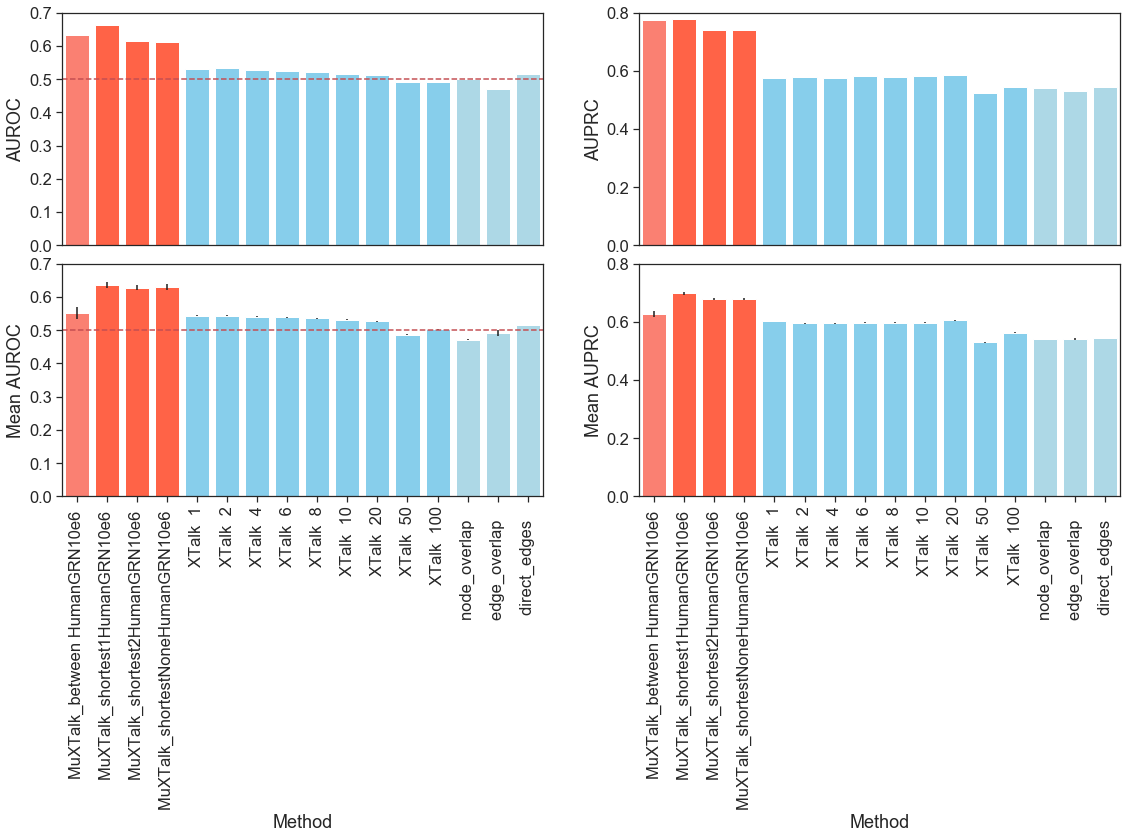

In [45]:
bar_color_dict = {'MuXTalk_between': 'salmon', 'MuXTalk_shortest': 'tomato', 'XTalk': 'skyblue', 
                  'node_overlap': 'lightblue', 'edge_overlap': 'lightblue', 'direct_edges': 'lightblue'}
bar_colors = [bar_color_dict[i] for i in master_auroc_df['method']]


sns.set(font_scale=1.5)
fig = plt.figure()
fig.set_size_inches(16, 12)
with sns.axes_style("ticks"):
    plt.subplot(2, 2, 1)
    plt.bar(master_auroc_df['method_params'], master_auroc_df['detected_AUROC'], color=bar_colors)
    plt.plot([-0.5, len(master_auroc_df)], [0.5, 0.5], 'r--')
    plt.xticks(rotation = 90)
    plt.xlim(-0.5, 15.5)
    plt.ylabel('AUROC')
    plt.ylim(0, 0.7)
    plt.xticks([])

    plt.subplot(2, 2, 2)
    plt.bar(master_auroc_df['method_params'], master_auroc_df['detected_AUPRC'], color=bar_colors) 
    plt.xticks(rotation = 90)
    plt.xlim(-0.5, 15.5)
    plt.ylabel('AUPRC')
    plt.ylim(0, 0.8)
    plt.xticks([])
    
    plt.subplot(2, 2, 3)
    plt.bar(master_auroc_df['method_params'], master_auroc_df['AUROC_mean'], color=bar_colors, yerr=master_auroc_df['AUROC_std'])
    plt.plot([-0.5, len(master_auroc_df)], [0.5, 0.5], 'r--')
    plt.xticks(rotation = 90)
    plt.xlim(-0.5, 15.5)
    plt.xlabel('Method')
    plt.ylabel('Mean AUROC')
    plt.ylim(0, 0.7)

    plt.subplot(2, 2, 4)
    plt.bar(master_auroc_df['method_params'], master_auroc_df['AUPRC_mean'], color=bar_colors, yerr=master_auroc_df['AUPRC_std'])    
    plt.xticks(rotation = 90)
    plt.xlim(-0.5, 15.5)
    plt.xlabel('Method')
    plt.ylabel('Mean AUPRC')
    plt.ylim(0, 0.8)
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.08)
    #plt.savefig(proj_path + 'all_methods_AUCs.pdf', format='pdf', bbox_inches='tight')     
    
    plt.show()

In [46]:
model_names = (master_auroc_df['method'] + '_' + master_auroc_df['sp_threshold'] + '_' + master_auroc_df['K']).values
mwu_AUROC_pval_df = pd.DataFrame(index=model_names[0:4], columns=model_names[4:])
mwu_AUPRC_pval_df = pd.DataFrame(index=model_names[0:4], columns=model_names[4:])
for i in np.arange(0, 4):
    for j in np.arange(4, 16):
        if st.mannwhitneyu(AUROC_dict[i], AUROC_dict[j])[1] == 0.0:
            mwu_AUROC_pval_df.at[model_names[i], model_names[j]] = '< 1e-217'
        else:    
            mwu_AUROC_pval_df.at[model_names[i], model_names[j]] = st.mannwhitneyu(AUROC_dict[i], AUROC_dict[j])[1]
        if st.mannwhitneyu(AUPRC_dict[i], AUPRC_dict[j])[1] == 0.0:
            mwu_AUPRC_pval_df.at[model_names[i], model_names[j]] = '< 1e-217'
        else:
            mwu_AUPRC_pval_df.at[model_names[i], model_names[j]] = st.mannwhitneyu(AUPRC_dict[i], AUPRC_dict[j])[1]

In [51]:
mwu_AUROC_pval_df

,XTalk_ _1,XTalk_ _2,XTalk_ _4,XTalk_ _6,XTalk_ _8,XTalk_ _10,XTalk_ _20,XTalk_ _50,XTalk_ _100,node_overlap_ _,edge_overlap_ _,direct_edges_ _
MuXTalk_between_ _,4.54625e-50,2.02965e-48,2.19311e-76,2.10715e-103,8.8076e-140,1.10007e-190,8.51225e-239,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217
MuXTalk_shortest_1_,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217
MuXTalk_shortest_2_,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217
MuXTalk_shortest_None_,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217,< 1e-217


In [48]:
mwu_AUROC_pval_df.to_csv(proj_path + 'MuXTalk_MWUpvals_AUROC.csv')
mwu_AUPRC_pval_df.to_csv(proj_path + 'MuXTalk_MWUpvals_AUPRC.csv')

In [54]:
masterGRN_auroc_df = pd.DataFrame(columns=['method', 'GRN', 'sp_threshold', 'K', 'detected_AUROC', 'detected_AUPRC', 'AUROC_mean', 'AUPRC_mean',
                                       'AUROC_std', 'AUPRC_std'])
masterGRN_auroc_df['method'] = ['MuXTalk_between', 'MuXTalk_shortest', 'MuXTalk_shortest', 'MuXTalk_shortest', 
                                'MuXTalk_between', 'MuXTalk_shortest', 'MuXTalk_shortest', 'MuXTalk_shortest', 
                                'MuXTalk_between', 'MuXTalk_shortest', 'MuXTalk_shortest', 'MuXTalk_shortest']
masterGRN_auroc_df['GRN'] = ['HumanGRN10e6', 'HumanGRN10e6', 'HumanGRN10e6', 'HumanGRN10e6', 
                         'HumanGRN10e5', 'HumanGRN10e5', 'HumanGRN10e5', 'HumanGRN10e5',
                         'HumanGRN10e4', 'HumanGRN10e4', 'HumanGRN10e4', 'HumanGRN10e4']
masterGRN_auroc_df['sp_threshold'] = [' ', 'None', '2', '1', ' ', 'None', '2', '1', ' ', 'None', '2', '1']
masterGRN_auroc_df['K'] = [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
masterGRN_auroc_df['method_params'] = masterGRN_auroc_df['method'] + masterGRN_auroc_df['sp_threshold'] + masterGRN_auroc_df['GRN'] + masterGRN_auroc_df['K']

for i in tqdm(np.arange(len(masterGRN_auroc_df)), position=0, leave=True):

    (detected_ranked_pathway_pairs_df, detected_ranked_pathway_pairs, 
     ranked_pathway_pairs_df, ranked_pathway_pairs, len_sig) = get_ranked_pathway_pairs_benchmark(XTalk_DB_positives_common_str, common_crosstalk_paths, 
                                                                                                  proj_path,
                                                                                                  method=masterGRN_auroc_df.at[i, 'method'], 
                                                                                                  multilink_params={'GRN': masterGRN_auroc_df.at[i, 'GRN'],
                                                                                                                    'PPI': 'PPI_Cheng_NatComms2019',
                                                                                                    'sp_threshold': masterGRN_auroc_df.at[i, 'sp_threshold']}, 
                                                                               XTalk_params={'K': masterGRN_auroc_df.at[i, 'K'], 'Nrand': 100})

    detected_roc_pr_stats = detected_auroc_auprc(detected_ranked_pathway_pairs, common_crosstalk_paths, XTalk_DB_positives_common_str)
    roc_pr_stats, AUROCs, AUPRCs = auroc_auprc(ranked_pathway_pairs, ranked_pathway_pairs_df, len_sig, common_crosstalk_paths, XTalk_DB_positives_common_str)
    
    masterGRN_auroc_df.at[i, 'detected_AUROC'] = detected_roc_pr_stats['AUROC']
    masterGRN_auroc_df.at[i, 'detected_AUPRC'] = detected_roc_pr_stats['AUPRC']
    masterGRN_auroc_df.at[i, 'AUROC_mean'] = roc_pr_stats['AUROC_mean']
    masterGRN_auroc_df.at[i, 'AUPRC_mean'] = roc_pr_stats['AUPRC_mean']
    masterGRN_auroc_df.at[i, 'AUROC_std'] = roc_pr_stats['AUROC_std']
    masterGRN_auroc_df.at[i, 'AUPRC_std'] = roc_pr_stats['AUPRC_std']



100%|██████████| 12/12 [24:00<00:00, 120.04s/it]


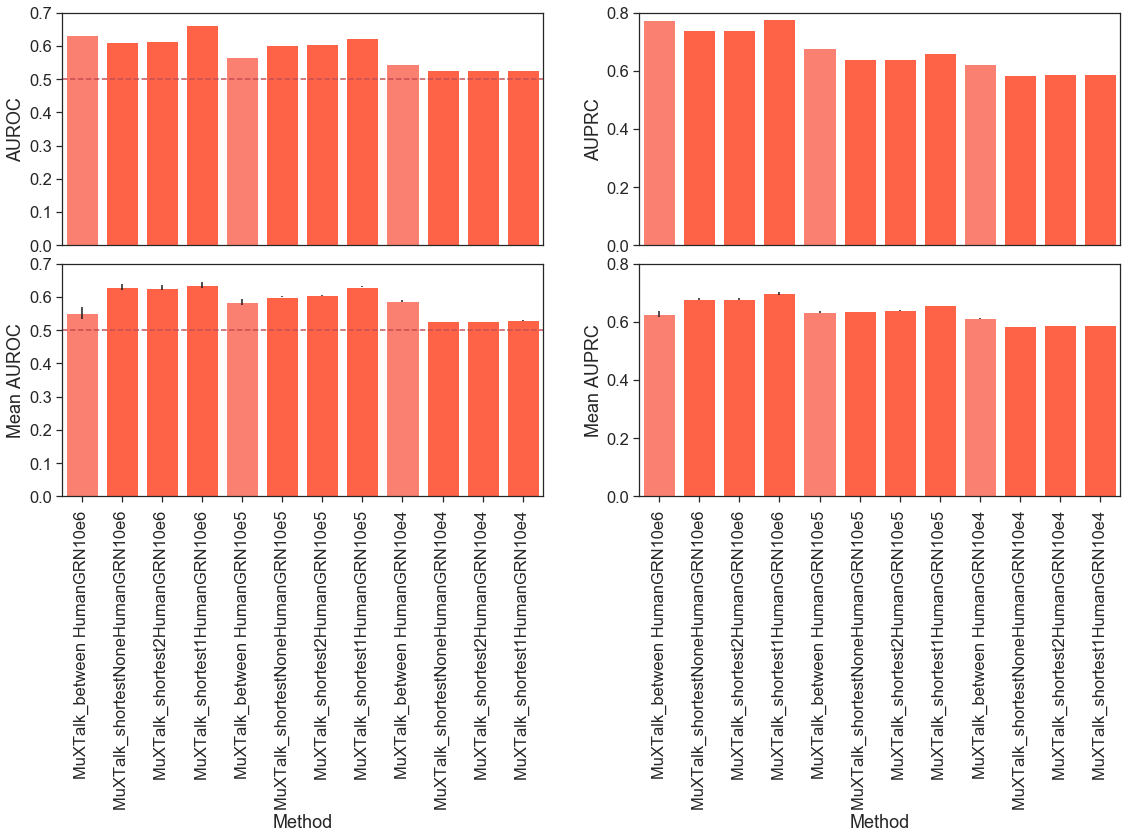

In [55]:
bar_color_dict = {'MuXTalk_between': 'salmon', 'MuXTalk_shortest': 'tomato', 'XTalk': 'skyblue', 
                  'node_overlap': 'lightblue', 'edge_overlap': 'lightblue', 'direct_edges': 'lightblue'}
bar_colors = [bar_color_dict[i] for i in masterGRN_auroc_df['method']]


sns.set(font_scale=1.5)
fig = plt.figure()
fig.set_size_inches(16, 12)
with sns.axes_style("ticks"):
    plt.subplot(2, 2, 1)
    plt.bar(masterGRN_auroc_df['method_params'], masterGRN_auroc_df['detected_AUROC'], color=bar_colors)
    plt.plot([-0.5, len(masterGRN_auroc_df)], [0.5, 0.5], 'r--')
    plt.xticks(rotation = 90)
    plt.xlim(-0.5, 11.5)
    plt.ylabel('AUROC')
    plt.ylim(0, 0.7)
    plt.xticks([])

    plt.subplot(2, 2, 2)
    plt.bar(masterGRN_auroc_df['method_params'], masterGRN_auroc_df['detected_AUPRC'], color=bar_colors) 
    plt.xticks(rotation = 90)
    plt.xlim(-0.5, 11.5)
    plt.ylabel('AUPRC')
    plt.ylim(0, 0.8)
    plt.xticks([])
        
    plt.subplot(2, 2, 3)
    plt.bar(masterGRN_auroc_df['method_params'], masterGRN_auroc_df['AUROC_mean'], color=bar_colors, yerr=masterGRN_auroc_df['AUROC_std'])
    plt.plot([-0.5, len(masterGRN_auroc_df)], [0.5, 0.5], 'r--')
    plt.xticks(rotation = 90)
    plt.xlim(-0.5, 11.5)
    plt.ylim(0, 0.7)
    plt.xlabel('Method')
    plt.ylabel('Mean AUROC')

    plt.subplot(2, 2, 4)
    plt.bar(masterGRN_auroc_df['method_params'], masterGRN_auroc_df['AUPRC_mean'], color=bar_colors, yerr=masterGRN_auroc_df['AUPRC_std'])    
    plt.xticks(rotation = 90)
    plt.xlim(-0.5, 11.5)
    plt.ylim(0, 0.8)
    plt.xlabel('Method')
    plt.ylabel('Mean AUPRC')
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.08)
    #plt.savefig(proj_path + 'multilink_allGRNs_AUCs.pdf', format='pdf', bbox_inches='tight')     
    
    plt.show()

# In silico validation using PubMed

In [57]:
common_perms_str = ['%s-%s'%(i, j) for i, j in permutations(common_crosstalk_paths, 2)]

between_detected_ranked_pathway_pairs_df = pd.read_csv(proj_path + 'HumanGRN10e6_PPI_Cheng_NatComms2019_between_detected_discovery.csv')
shortestsp1_detected_ranked_pathway_pairs_df = pd.read_csv(proj_path + 'HumanGRN10e6_PPI_Cheng_NatComms2019_sp1_shortest_detected_discovery.csv')
all_pairs_discovery_counts_noyearlimit = pd.read_csv(proj_path + 'all_pairs_counts_1900-2022.csv')

between_detected_discovery_counts_noyearlimit = pd.merge(between_detected_ranked_pathway_pairs_df, all_pairs_discovery_counts_noyearlimit, 
                                                         left_on='Unnamed: 0', right_on='Unnamed: 0', how='left')
shortestsp1_detected_discovery_counts_noyearlimit = pd.merge(shortestsp1_detected_ranked_pathway_pairs_df, all_pairs_discovery_counts_noyearlimit, 
                                                         left_on='Unnamed: 0', right_on='Unnamed: 0', how='left')

between_detected_discovery_counts_noyearlimit['in_XTalkDB_Gold'] = ''
shortestsp1_detected_discovery_counts_noyearlimit['in_XTalkDB_Gold'] = ''
between_detected_discovery_counts_noyearlimit['in_XTalkDB'] = np.nan
shortestsp1_detected_discovery_counts_noyearlimit['in_XTalkDB'] = np.nan

for n, (i, j) in enumerate(between_detected_discovery_counts_noyearlimit[['Pathway A', 'Pathway B']].values):
    if ('%s-%s'%(i, j) in  XTalk_DB_positives_common_str) & ('%s-%s'%(j, i) in  XTalk_DB_positives_common_str):
        between_detected_discovery_counts_noyearlimit.at[n, 'in_XTalkDB_Gold'] = 'Both'
    elif ('%s-%s'%(i, j) in  XTalk_DB_positives_common_str) & ('%s-%s'%(j, i) not in  XTalk_DB_positives_common_str):
        between_detected_discovery_counts_noyearlimit.at[n, 'in_XTalkDB_Gold'] = 'A->B'
    elif ('%s-%s'%(j, i) in  XTalk_DB_positives_common_str) & ('%s-%s'%(i, j) not in  XTalk_DB_positives_common_str):
        between_detected_discovery_counts_noyearlimit.at[n, 'in_XTalkDB_Gold'] = 'B->A'
    else:
        between_detected_discovery_counts_noyearlimit.at[n, 'in_XTalkDB_Gold'] = 'Neither'
              
    if between_detected_discovery_counts_noyearlimit.loc[n]['Unnamed: 0'] in common_perms_str:
        between_detected_discovery_counts_noyearlimit.at[n, 'in_XTalkDB'] = 1.0
    else:
        between_detected_discovery_counts_noyearlimit.at[n, 'in_XTalkDB'] = 0.0
        

for n, (i, j) in enumerate(shortestsp1_detected_discovery_counts_noyearlimit[['Pathway A', 'Pathway B']].values):
    if ('%s-%s'%(i, j) in  XTalk_DB_positives_common_str) & ('%s-%s'%(j, i) in  XTalk_DB_positives_common_str):
        shortestsp1_detected_discovery_counts_noyearlimit.at[n, 'in_XTalkDB_Gold'] = 'Both'
    elif ('%s-%s'%(i, j) in  XTalk_DB_positives_common_str) & ('%s-%s'%(j, i) not in  XTalk_DB_positives_common_str):
        shortestsp1_detected_discovery_counts_noyearlimit.at[n, 'in_XTalkDB_Gold'] = 'A->B'
    elif ('%s-%s'%(j, i) in  XTalk_DB_positives_common_str) & ('%s-%s'%(i, j) not in  XTalk_DB_positives_common_str):
        shortestsp1_detected_discovery_counts_noyearlimit.at[n, 'in_XTalkDB_Gold'] = 'B->A'
    else:
        shortestsp1_detected_discovery_counts_noyearlimit.at[n, 'in_XTalkDB_Gold'] = 'Neither'
              
    if shortestsp1_detected_discovery_counts_noyearlimit.loc[n]['Unnamed: 0'] in common_perms_str:
        shortestsp1_detected_discovery_counts_noyearlimit.at[n, 'in_XTalkDB'] = 1.0
    else:
        shortestsp1_detected_discovery_counts_noyearlimit.at[n, 'in_XTalkDB'] = 0.0

In [59]:
# remove the benchmark pairs from among MuXTalk the detected pairs
between_detected_discovery_counts_noyearlimit_d = between_detected_discovery_counts_noyearlimit[between_detected_discovery_counts_noyearlimit
                                                                                                ['in_XTalkDB'] == 0.0]
shortestsp1_detected_discovery_counts_noyearlimit_d = shortestsp1_detected_discovery_counts_noyearlimit[shortestsp1_detected_discovery_counts_noyearlimit
                                                                                                ['in_XTalkDB'] == 0.0]

In [74]:
between_precision1 = []
between_precision2 = []
shortestsp1_precision1 = []
shortestsp1_precision2 = []
for topN in np.arange(10, 410, 10):
    between_precision1.append(len(between_detected_discovery_counts_noyearlimit_d[0:topN][between_detected_discovery_counts_noyearlimit_d[0:topN]
                                                                                          ['Counts1'] > 0]) / 
                              len(between_detected_discovery_counts_noyearlimit_d[0:topN]))
    between_precision2.append(len(between_detected_discovery_counts_noyearlimit_d[0:topN][between_detected_discovery_counts_noyearlimit_d[0:topN]
                                                                                          ['Counts2'] > 0]) / 
                              len(between_detected_discovery_counts_noyearlimit_d[0:topN]))
    shortestsp1_precision1.append(len(shortestsp1_detected_discovery_counts_noyearlimit_d[0:topN][shortestsp1_detected_discovery_counts_noyearlimit_d[0:topN]['Counts1'] > 0]) / 
                              len(shortestsp1_detected_discovery_counts_noyearlimit_d[0:topN]))
    shortestsp1_precision2.append(len(shortestsp1_detected_discovery_counts_noyearlimit_d[0:topN][shortestsp1_detected_discovery_counts_noyearlimit_d[0:topN]['Counts2'] > 0]) / 
                              len(shortestsp1_detected_discovery_counts_noyearlimit_d[0:topN]))
    
between_precision_manual = []
for topN in np.arange(10, 60, 10):
    between_precision_manual.append(len(curated_between[0:topN][curated_between[0:topN]['Direction']=='a2b']) / 
                                       len(curated_between[0:topN]))
shortestsp1_precision_manual = []
for topN in np.arange(10, 60, 10):
    shortestsp1_precision_manual.append(len(curated_shortestsp1[0:topN][curated_shortestsp1[0:topN]['Direction']=='a2b']) / 
                                       len(curated_shortestsp1[0:topN]))

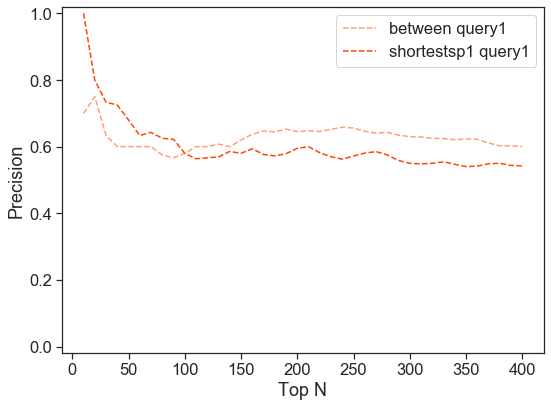

In [75]:
sns.set(font_scale=1.5)
fig = plt.figure()
fig.set_size_inches(8, 6)
with sns.axes_style("ticks"):
    plt.plot(np.arange(10, 410, 10), between_precision1, label='between query1', color='lightsalmon', linestyle='--')
    plt.plot(np.arange(10, 410, 10), shortestsp1_precision1, label='shortestsp1 query1', color='orangered', linestyle='--')
    plt.ylim(-0.02, 1.02)
    plt.ylabel('Precision')
    plt.xlabel('Top N')
    plt.legend()
    plt.tight_layout()
    #plt.savefig(proj_path + 'between_shortestsp_query1_precision_top400_discoveryonly.pdf', format='pdf', bbox_inches='tight')   
    plt.show()

In [76]:
print(np.mean(shortestsp1_precision1[0:5]), np.mean(between_precision1[0:5]))
print(np.mean(shortestsp1_precision_manual), np.mean(between_precision_manual))

0.7876666666666667 0.6566666666666666
0.8396666666666667 0.605


# Change file names to Supplementary Files 1 and 2 below

In [77]:
curated_between = pd.read_csv('/Users/ardahalu/Downloads/sendout_between_detected_discovery_query1_top100_pubs.csv')
curated_shortestsp1 = pd.read_csv('/Users/ardahalu/Downloads/newsendout_shortest_sp1_detected_discovery_query1_top100_pubs 2.csv')

In [78]:
between_precision1 = []
between_precision2 = []
shortestsp1_precision1 = []
shortestsp1_precision2 = []
for topN in np.arange(2, 402, 2):
    between_precision1.append(len(between_detected_discovery_counts_noyearlimit_d[0:topN][between_detected_discovery_counts_noyearlimit_d[0:topN]
                                                                                          ['Counts1'] > 0]) / 
                              len(between_detected_discovery_counts_noyearlimit_d[0:topN]))
    between_precision2.append(len(between_detected_discovery_counts_noyearlimit_d[0:topN][between_detected_discovery_counts_noyearlimit_d[0:topN]
                                                                                          ['Counts2'] > 0]) / 
                              len(between_detected_discovery_counts_noyearlimit_d[0:topN]))
    shortestsp1_precision1.append(len(shortestsp1_detected_discovery_counts_noyearlimit_d[0:topN][shortestsp1_detected_discovery_counts_noyearlimit_d[0:topN]['Counts1'] > 0]) / 
                              len(shortestsp1_detected_discovery_counts_noyearlimit_d[0:topN]))
    shortestsp1_precision2.append(len(shortestsp1_detected_discovery_counts_noyearlimit_d[0:topN][shortestsp1_detected_discovery_counts_noyearlimit_d[0:topN]['Counts2'] > 0]) / 
                              len(shortestsp1_detected_discovery_counts_noyearlimit_d[0:topN]))

between_precision_manual = []
for topN in np.arange(2, 52, 2):
    between_precision_manual.append(len(curated_between[0:topN][curated_between[0:topN]['Direction']=='a2b']) / 
                                       len(curated_between[0:topN]))
shortestsp1_precision_manual = []
for topN in np.arange(2, 52, 2):
    shortestsp1_precision_manual.append(len(curated_shortestsp1[0:topN][curated_shortestsp1[0:topN]['Direction']=='a2b']) / 
                                       len(curated_shortestsp1[0:topN]))

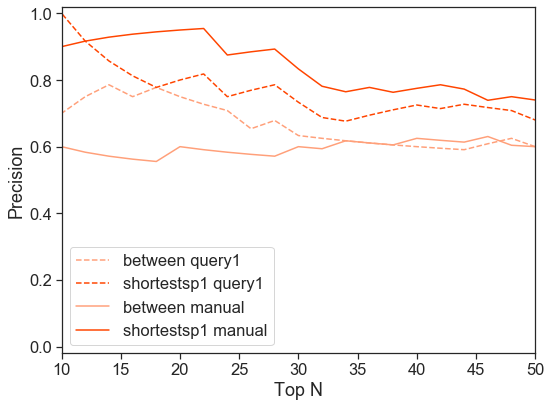

In [79]:
sns.set(font_scale=1.5)
fig = plt.figure()
fig.set_size_inches(8, 6)
with sns.axes_style("ticks"):
    plt.plot(np.arange(2, 402, 2), between_precision1, label='between query1', color='lightsalmon', linestyle='--')
    plt.plot(np.arange(2, 402, 2), shortestsp1_precision1, label='shortestsp1 query1', color='orangered', linestyle='--')
    plt.plot(np.arange(2, 52, 2), between_precision_manual, label='between manual', color='lightsalmon', linestyle='-')
    plt.plot(np.arange(2, 52, 2), shortestsp1_precision_manual, label='shortestsp1 manual', color='orangered', linestyle='-')
    
    plt.ylim(-0.02, 1.02)
    plt.xlim(10, 50)
    plt.ylabel('Precision')
    plt.xlabel('Top N')
    plt.legend()
    plt.tight_layout()
    #plt.savefig(proj_path + 'between_shortestsp_query1-manual_precision_top50_discoveryonly.pdf', format='pdf', bbox_inches='tight')  
    plt.show()

# Leave-one-layer-out sensitivity analysis

In [7]:
method='MuXTalk_shortest'
input_PPI = 'PPI_Cheng_NatComms2019'
input_GRN = 'HumanGRN10e6'
input_PPI_ID_format = 'Entrez'
input_GRN_ID_format = 'Gene_Symbol'
(KEGG_PPI_allnodes_entrez, GRN_KEGG_PPI_edges, PPI_all_edges_entrez, KEGG_PPI_all_edges_entrez, KEGG_PPI_allnodes_entrez_df, 
 KEGG_interaction_types_dict, KEGG_all_edges_entrez, KEGG_all_paths, KEGG_path_nodes_entrez_dict, 
 all_motif_types, all_motif_types_list) = process_data(proj_path, input_PPI, input_PPI_ID_format, 
                                                       input_GRN, input_GRN_ID_format, input_filenames_dict)

(common_crosstalk_paths, XTalk_DB_positives_common, XTalk_DB_positives_common_str) = XTalk_DB(KEGG_all_paths, proj_path, input_filenames_dict)

(detected_ranked_pathway_pairs_df_dict, detected_ranked_pathway_pairs_dict, ranked_pathway_pairs_df_dict, 
            ranked_pathway_pairs_dict, len_sig_dict)  = get_ranked_pathway_pairs_LOLO(XTalk_DB_positives_common_str, common_crosstalk_paths, 
                                                                                      KEGG_interaction_types_dict,
                                                                                      proj_path, method=method,
                                                                                      multilink_params={'GRN': input_GRN, 
                                                                                                        'PPI': input_PPI, 
                                                                                                        'sp_threshold': 1}, 
                                                                                      XTalk_params={'K': 1, 'Nrand': 100})

multilink_params={'GRN': input_GRN, 'PPI': input_PPI, 'sp_threshold': 1}
LOLO_auroc_df = pd.DataFrame(index=KEGG_interaction_types_dict.keys(), 
                             columns=['method', 'GRN', 'sp_threshold', 'detected_AUROC', 'detected_AUPRC', 
                                      'AUROC_mean', 'AUPRC_mean', 'AUROC_std', 'AUPRC_std'])
LOLO_auroc_df['method'] = 11*[method]
LOLO_auroc_df['GRN'] = 11*[multilink_params['GRN']]
LOLO_auroc_df['sp_threshold'] = 11*[multilink_params['sp_threshold']]

for excluded_layer in LOLO_auroc_df.index:
    
    detected_roc_pr_stats = detected_auroc_auprc(detected_ranked_pathway_pairs_dict[excluded_layer], common_crosstalk_paths, 
                                                 XTalk_DB_positives_common_str)
    roc_pr_stats, AUROCs, AUPRCs = auroc_auprc(ranked_pathway_pairs_dict[excluded_layer], ranked_pathway_pairs_df_dict[excluded_layer], len_sig_dict[excluded_layer], 
                               common_crosstalk_paths, XTalk_DB_positives_common_str, nonsig_Nrand = 1000)
    
    
    LOLO_auroc_df.at[excluded_layer, 'detected_AUROC'] = detected_roc_pr_stats['AUROC']
    LOLO_auroc_df.at[excluded_layer, 'detected_AUPRC'] = detected_roc_pr_stats['AUPRC']
    LOLO_auroc_df.at[excluded_layer, 'AUROC_mean'] = roc_pr_stats['AUROC_mean']
    LOLO_auroc_df.at[excluded_layer, 'AUPRC_mean'] = roc_pr_stats['AUPRC_mean']
    LOLO_auroc_df.at[excluded_layer, 'AUROC_std'] = roc_pr_stats['AUROC_std']
    LOLO_auroc_df.at[excluded_layer, 'AUPRC_std'] = roc_pr_stats['AUPRC_std']

Loading Gene Symbol-Entrez ID-Uniprot ID mappings...
Loading PPI edges...
Processing PPI edgelist...
Loading GRN edges...
Processing GRN edgelist...
Loading KEGG signaling network edges...
Cross-mapping Gene Symbols, Entrez IDs and Uniprot IDs...
Combining KEGG and PPI edges...
Generating edge and node dictionaries of KEGG pathways...
Generating KEGG pathway-specific dataframes...
Processing XTalkDB data for benchmarking...


100%|██████████| 1000/1000 [01:50<00:00,  9.02it/s]


In [8]:
LOLO_auroc_df

,method,GRN,sp_threshold,detected_AUROC,detected_AUPRC,AUROC_mean,AUPRC_mean,AUROC_std,AUPRC_std
activation,MuXTalk_shortest,HumanGRN10e6,1,0.665347,0.777361,0.636636,0.697611,0.00926868,0.0036091
binding/association,MuXTalk_shortest,HumanGRN10e6,1,0.66393,0.777534,0.636093,0.697533,0.00916225,0.00370658
compound,MuXTalk_shortest,HumanGRN10e6,1,0.66393,0.777534,0.636009,0.697539,0.0096617,0.00380788
dephosphorylation,MuXTalk_shortest,HumanGRN10e6,1,0.66393,0.777534,0.636358,0.697641,0.00943501,0.0037324
dissociation,MuXTalk_shortest,HumanGRN10e6,1,0.66393,0.777534,0.635526,0.69737,0.00926111,0.00361543
indirect effect,MuXTalk_shortest,HumanGRN10e6,1,0.66393,0.777534,0.635928,0.697468,0.00947928,0.00384471
inhibition,MuXTalk_shortest,HumanGRN10e6,1,0.66393,0.777534,0.636034,0.697589,0.00938212,0.00368572
phosphorylation,MuXTalk_shortest,HumanGRN10e6,1,0.66393,0.777534,0.63617,0.697572,0.00932036,0.00368036
ppi,MuXTalk_shortest,HumanGRN10e6,1,0,0,0.500874,0.555717,0.0232145,0.0203194
state change,MuXTalk_shortest,HumanGRN10e6,1,0.66393,0.777534,0.636163,0.697604,0.00961853,0.00384875


# ChIP-seq enrichment analysis using ChIPAtlas

In [9]:
chipatlas_temp = pd.read_csv(proj_path + 'wabi_chipatlas_2023-0217-0507-56-509-184150.txt', sep='\t', header=None)

In [10]:
neurotrophin_genes = pd.read_csv(proj_path + 'Neurotrophin_genes.csv')
tgfb_genes = pd.read_csv(proj_path + 'TGFb_genes.csv')

In [11]:
chipatlas_temp['log10_p'] = -chipatlas_temp[8]
chipatlas_temp['log2FE'] = np.log2(chipatlas_temp[10])
chipatlas_temp = chipatlas_temp[(~np.isinf(chipatlas_temp['log2FE'])) & (~pd.isnull(chipatlas_temp['log2FE']))]

/Users/ardahalu/anaconda3/envs/py3_main/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


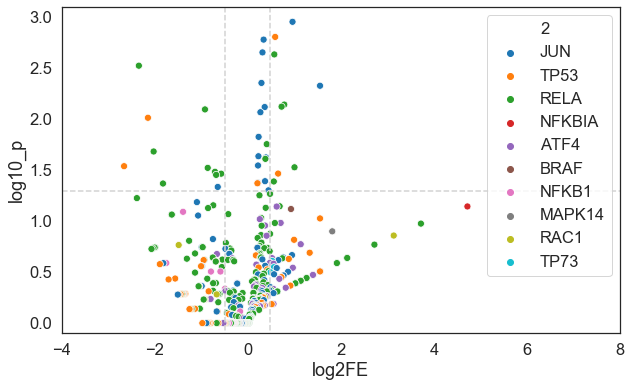

In [12]:
FEcutoff = 1.4
fig = plt.figure()
fig.set_size_inches(10, 6)
sns.set(font_scale=1.5)
with sns.axes_style('white'):
    sns.scatterplot(data=chipatlas_temp[chipatlas_temp[2].isin(neurotrophin_genes['symbol'].values)], x='log2FE', y='log10_p', 
                    palette='tab10', hue=2, legend='brief', s=50, alpha=1.0)
    plt.plot([-4, 8], [-np.log10(0.05), -np.log10(0.05)], c='lightgrey', linestyle='--')
    plt.plot([np.log2(FEcutoff), np.log2(FEcutoff)], [-np.log10(0.00001), -np.log10(3)], c='lightgrey', linestyle='--')
    #plt.plot([0, 0], [-np.log10(0.00001), -np.log10(3)], c='lightgrey', linestyle='--')
    plt.plot([-np.log2(FEcutoff), -np.log2(FEcutoff)], [-np.log10(0.00001), -np.log10(3)], c='lightgrey', linestyle='--')
    plt.ylim(-0.1, 3.1)
    plt.xlim(-4, 8)
#plt.savefig(proj_path + 'neuro-TGFb_ChIPAtlas_legend.pdf', format='pdf')
plt.show()